In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as ply
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet
%matplotlib inline

In [2]:
df_actual = pd.read_csv("../write_data/Salt Lake City.csv")
df_actual['time'] = pd.to_datetime(df_actual['time'])

In [3]:
df_fut = pd.read_csv("../write_data/Salt Lake City_future.csv")
df_fut['ds'] = pd.to_datetime(df_fut['ds'])

In [4]:
zippies = df_fut.Zip_code.unique()

In [5]:
all_zips = pd.read_csv("../write_data/zillow_housing_zipcodes.csv")
all_zips['Date_index'] = pd.to_datetime(all_zips['Date_index'])
all_zips = all_zips.set_index('Date_index')

In [6]:
zippies_strings = ["%.0f" % number for number in zippies]

In [7]:
metro_zips = all_zips.filter(items=zippies_strings)

In [8]:
actual_mean = metro_zips.mean(axis=1)

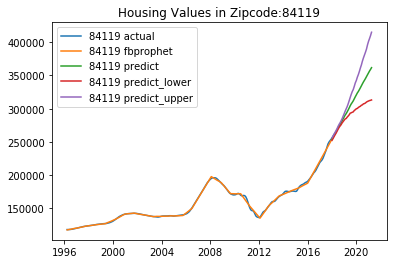

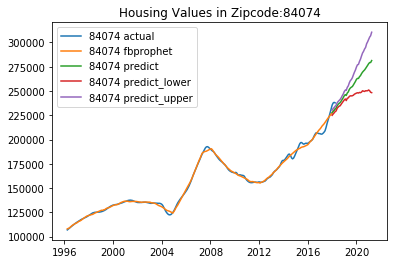

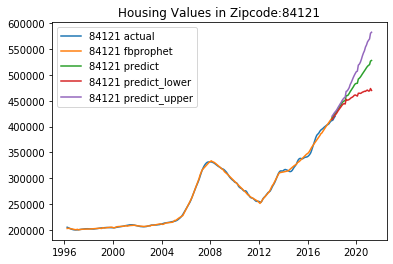

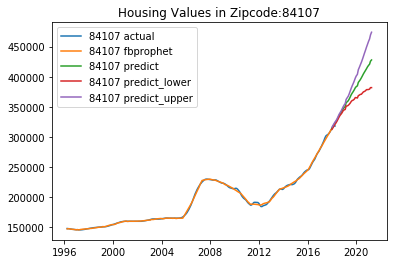

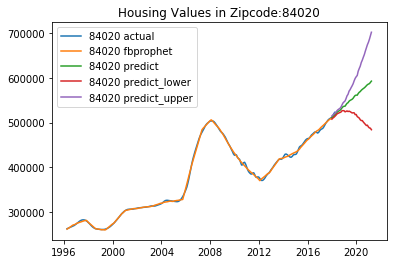

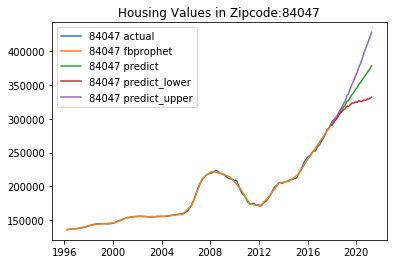

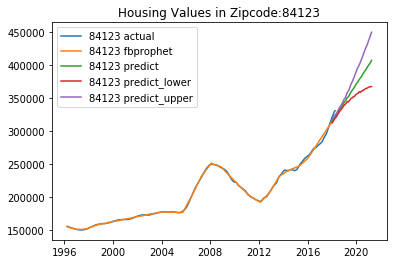

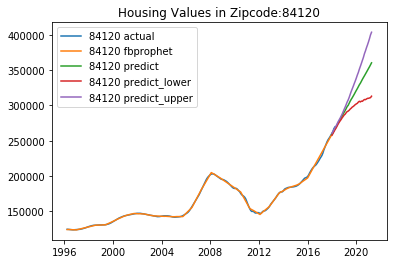

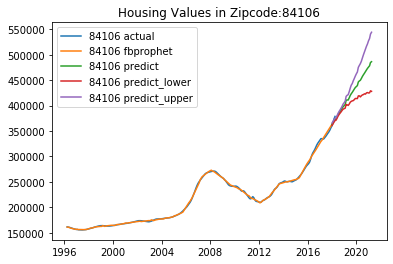

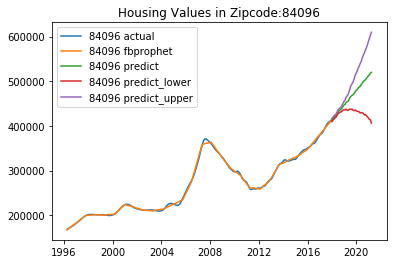

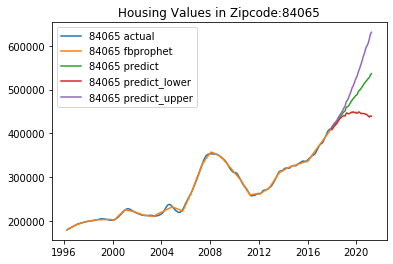

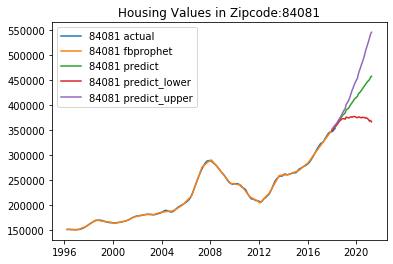

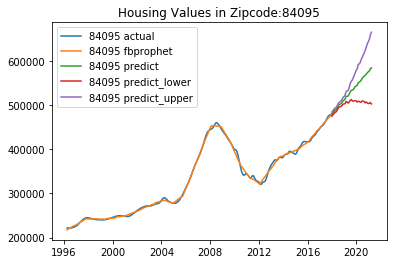

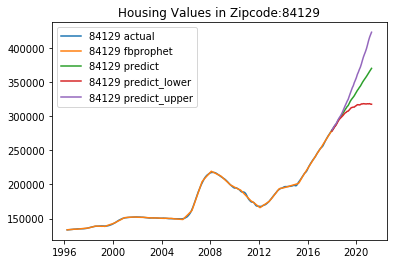

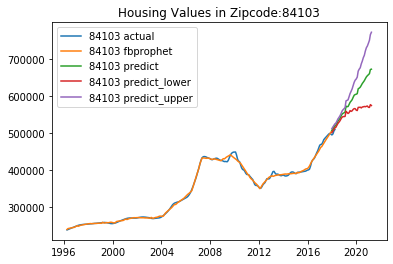

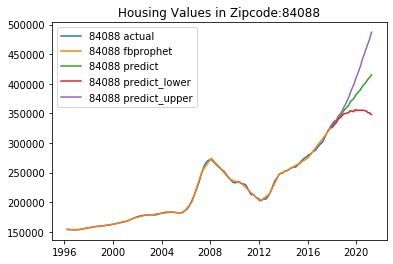

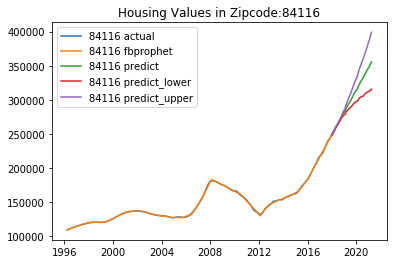

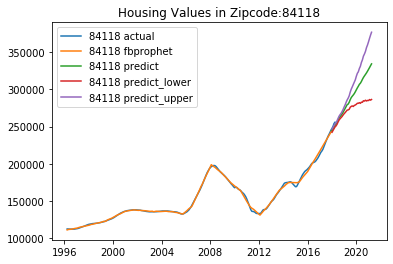

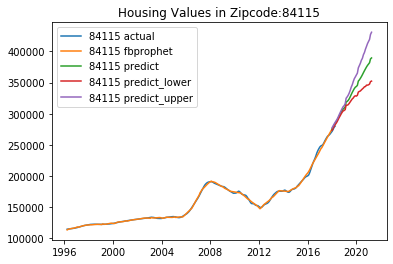

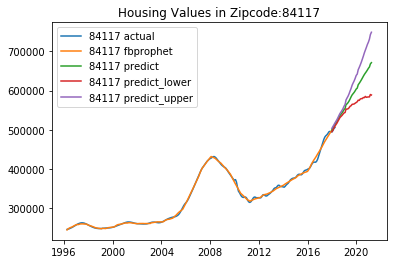

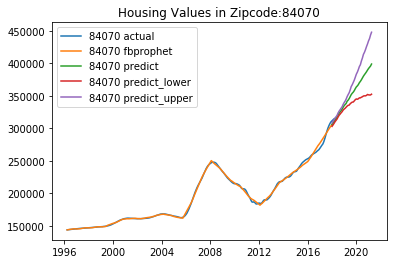

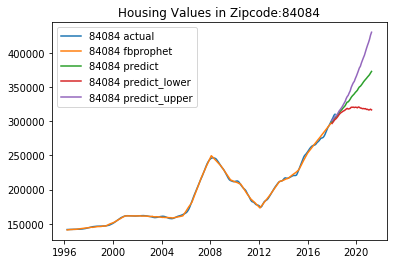

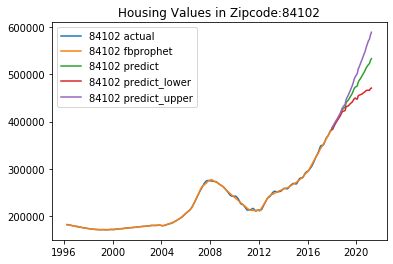

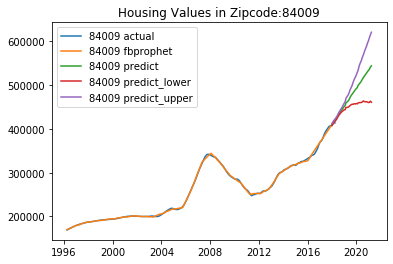

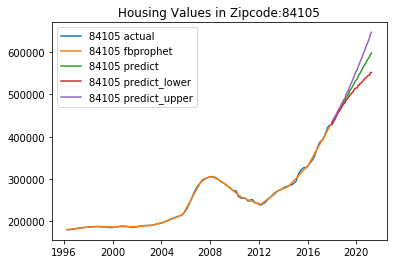

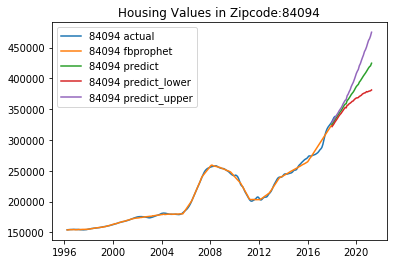

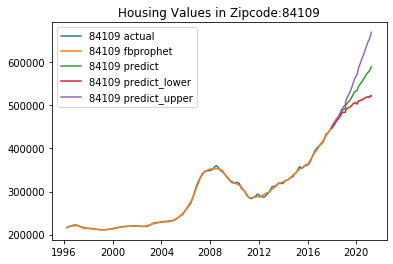

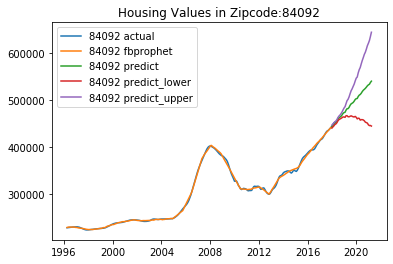

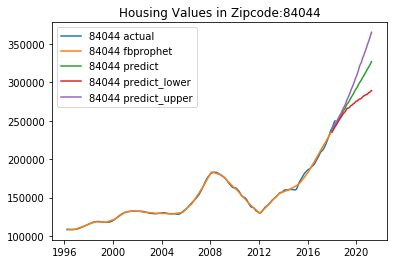

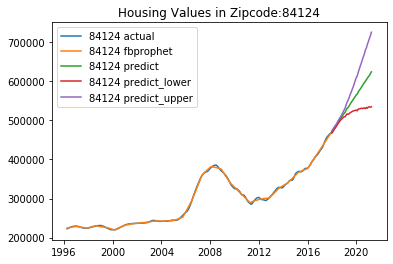

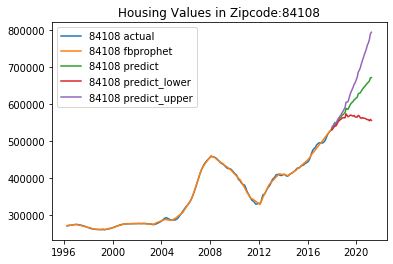

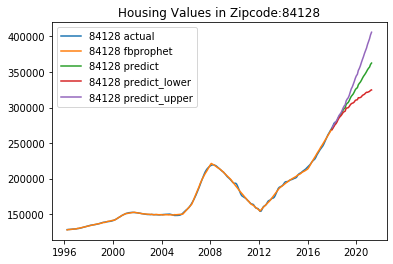

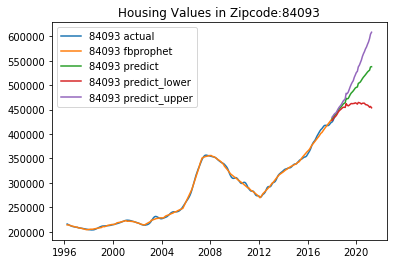

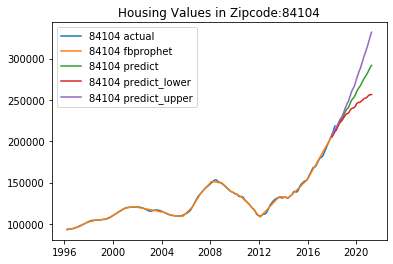

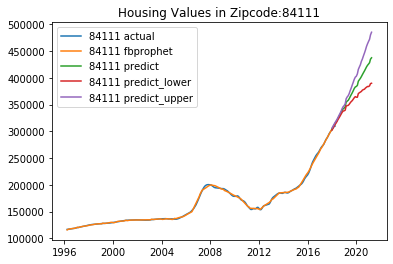

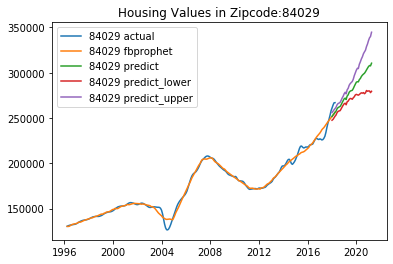

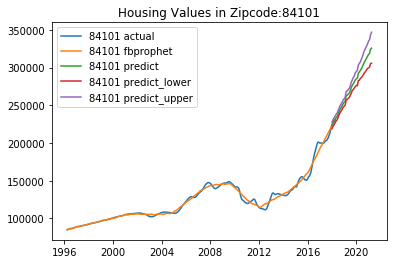

In [9]:
for zippy in zippies:
    
    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['value'], 
             label=f'{zippy} actual')

    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} fbprophet')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} predict')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_lower'], 
             label=f'{zippy} predict_lower')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_upper'], 
             label=f'{zippy} predict_upper')
    
    plt.legend(loc='best')
    plt.title(f"Housing Values in Zipcode:{zippy}")
    
    plt.show()

In [10]:
zippies

array([84119, 84074, 84121, 84107, 84020, 84047, 84123, 84120, 84106,
       84096, 84065, 84081, 84095, 84129, 84103, 84088, 84116, 84118,
       84115, 84117, 84070, 84084, 84102, 84009, 84105, 84094, 84109,
       84092, 84044, 84124, 84108, 84128, 84093, 84104, 84111, 84029,
       84101])

In [11]:
metro_annual = metro_zips.resample("YS").mean()
metro_annual_pct = metro_annual.pct_change()
metro_annual_pct_diff = metro_annual.pct_change().diff()

In [12]:
metro_annual_pct.min().min(), metro_annual_pct.max().max()

(-0.14901641015187028, 0.2731398542935626)

In [13]:
metro_annual_pct_diff.min().min(), metro_annual_pct_diff.max().max()

(-0.29581809069131115, 0.2773703466597003)

In [14]:
df_pred_wide = df_actual.pivot(index='time', columns='Zip_code',values='yhat')
df_fut_wide = df_fut.pivot(index='ds', columns='Zip_code',values='yhat')

In [15]:
fbproph = pd.concat([df_pred_wide.resample("YS").mean(), df_fut_wide.resample("YS").mean()], axis=0)
fb_pct_change = fbproph.pct_change()
fb_ann = fbproph.pct_change().diff()

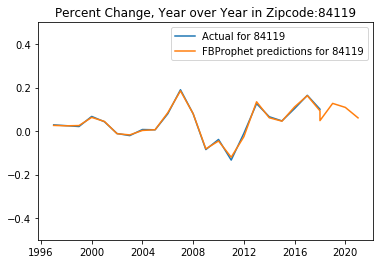

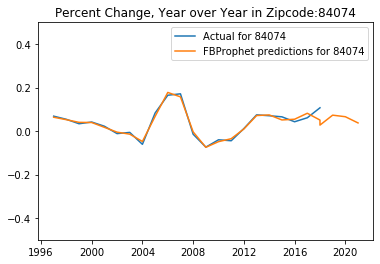

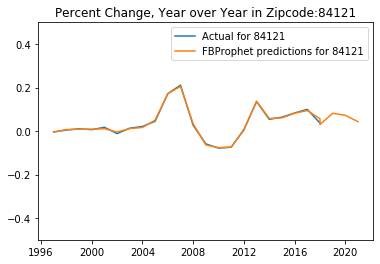

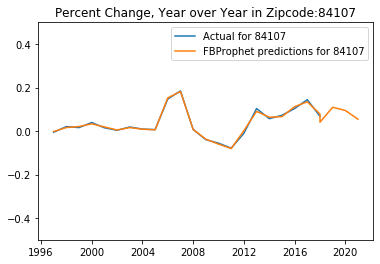

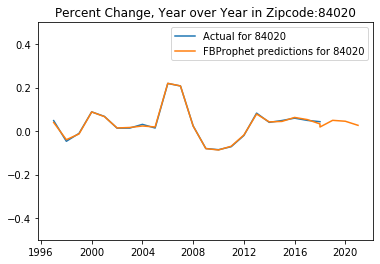

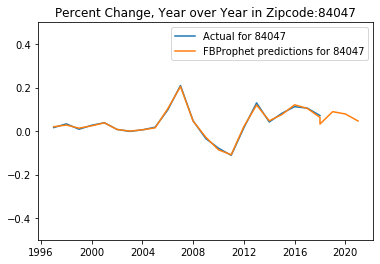

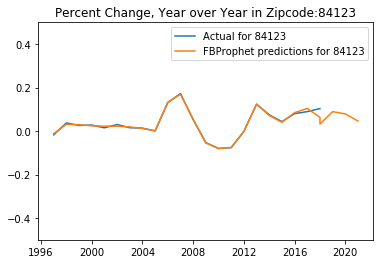

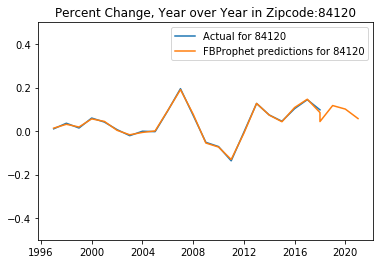

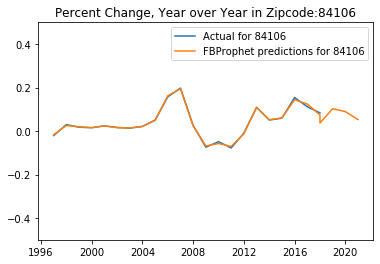

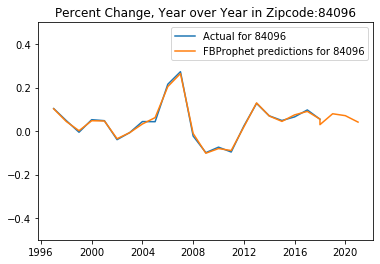

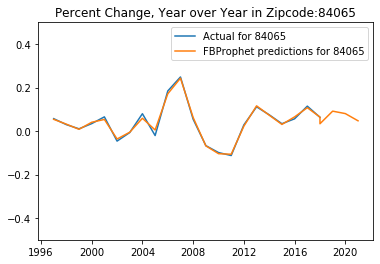

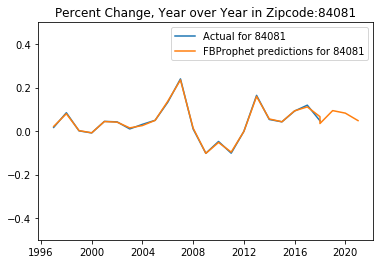

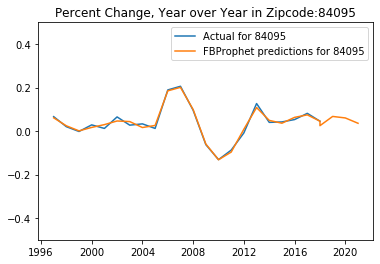

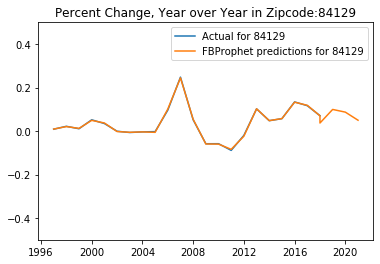

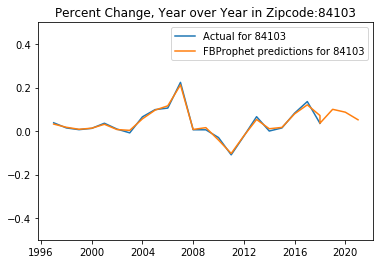

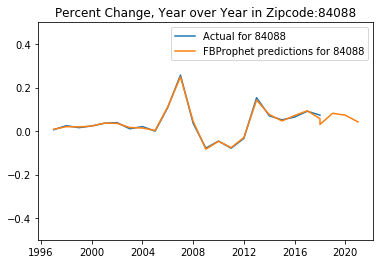

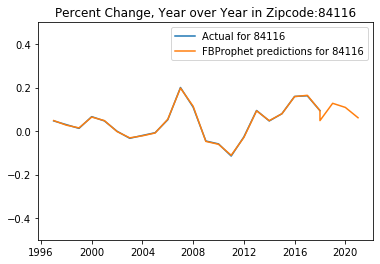

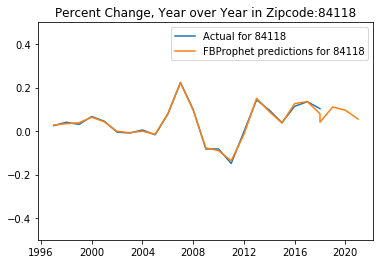

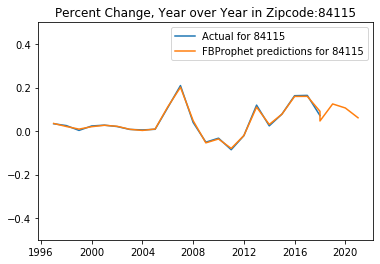

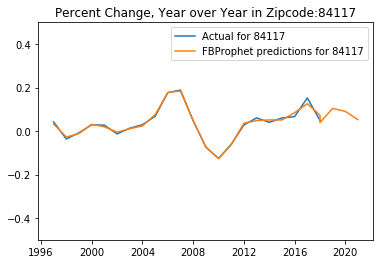

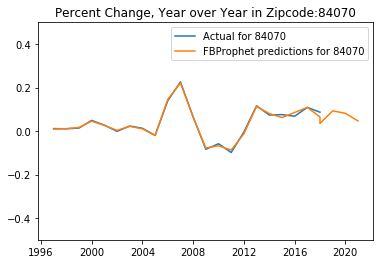

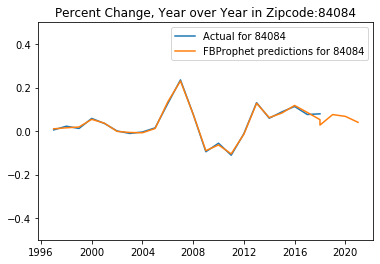

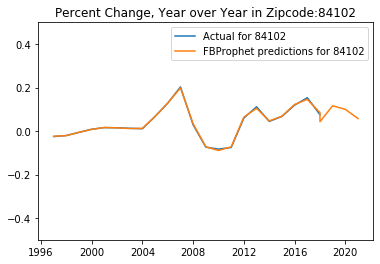

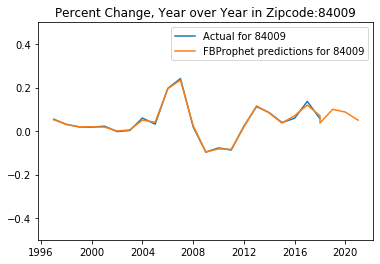

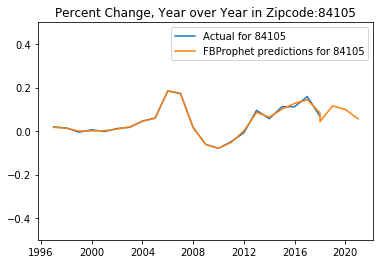

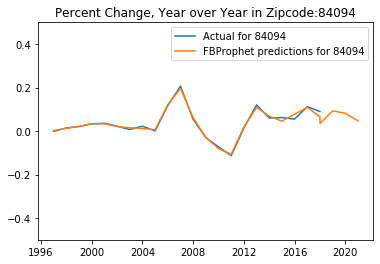

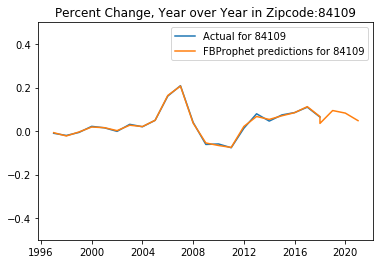

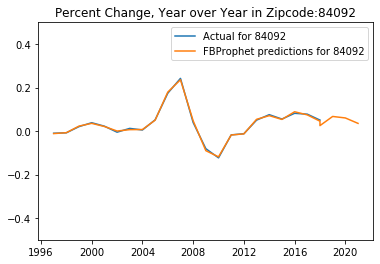

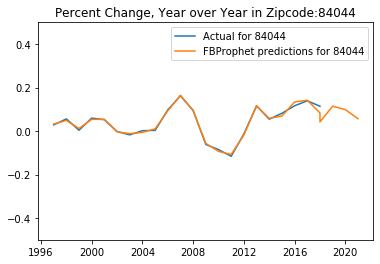

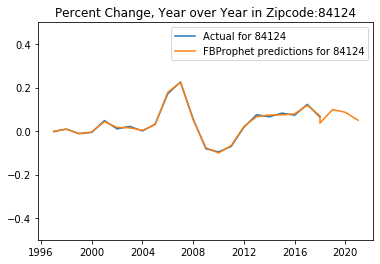

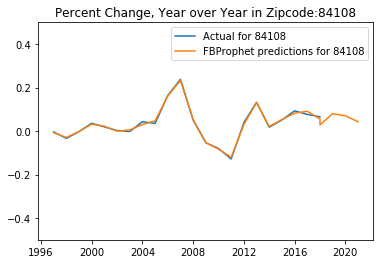

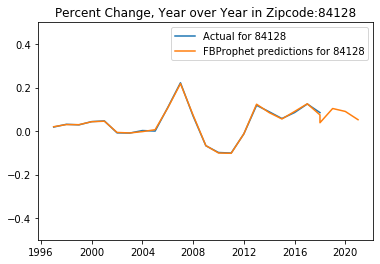

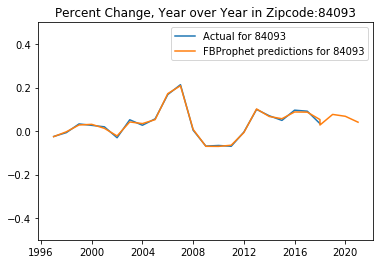

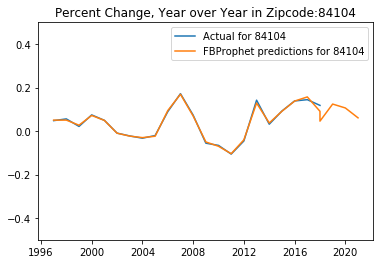

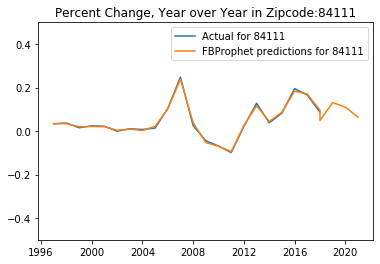

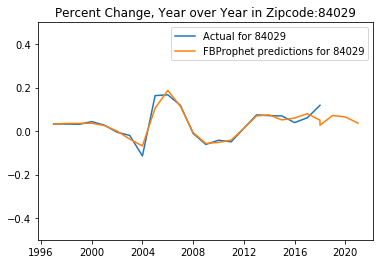

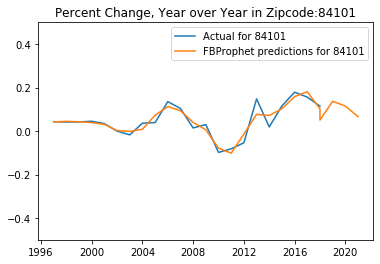

In [16]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct.index, 
         metro_annual_pct[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_pct_change.index, 
             fb_pct_change[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.5,0.5)
    plt.legend(loc='best')
    plt.title(f"Percent Change, Year over Year in Zipcode:{zippy}")
    `
    plt.show()

In [20]:
metro_annual_pct.tail(3)

,84119,84074,84121,84107,84020,84047,84123,84120,84106,84096,...,84092,84044,84124,84108,84128,84093,84104,84111,84029,84101
Date_index,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.103581,0.042852,0.083112,0.103650,0.059471,0.112341,0.080325,0.103120,0.154302,0.065249,...,0.081760,0.116299,0.072958,0.093158,0.085215,0.096155,0.138561,0.195326,0.039053,0.178786
2017-01-01,0.164480,0.061265,0.099803,0.144473,0.049158,0.105508,0.089450,0.144480,0.111871,0.097210,...,0.077702,0.139284,0.122893,0.076591,0.124590,0.091418,0.144458,0.165504,0.061234,0.156331
2018-01-01,0.100629,0.107098,0.036706,0.067794,0.043178,0.071519,0.103484,0.097601,0.083789,0.054584,...,0.050561,0.114156,0.064065,0.065706,0.084943,0.034122,0.118182,0.087171,0.118676,0.114631


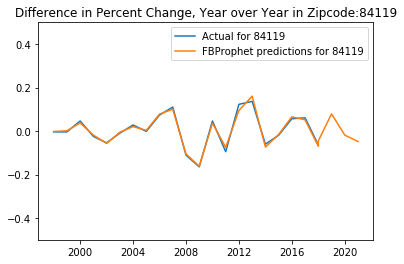

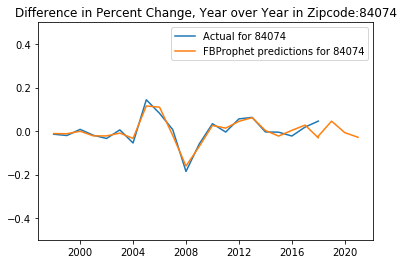

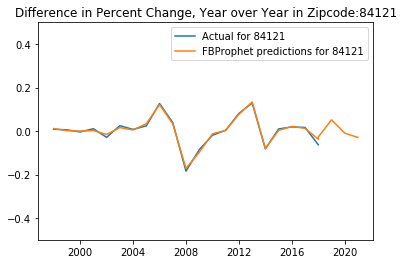

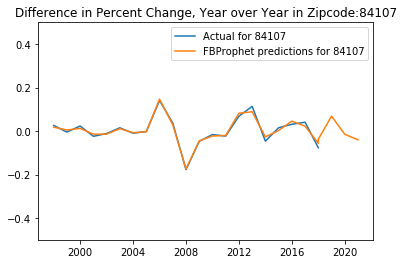

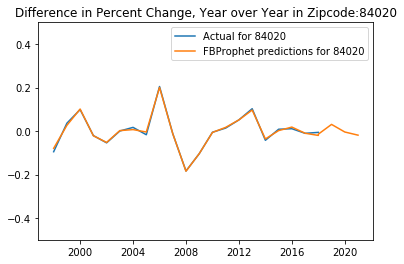

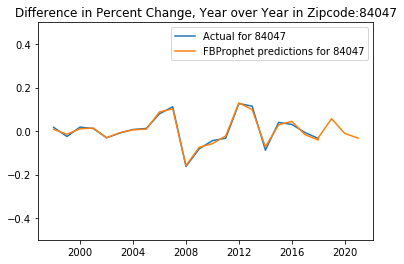

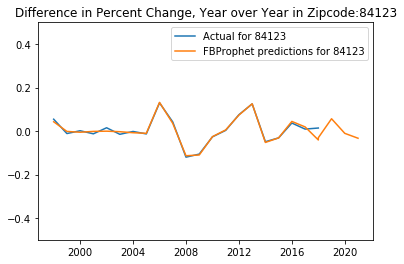

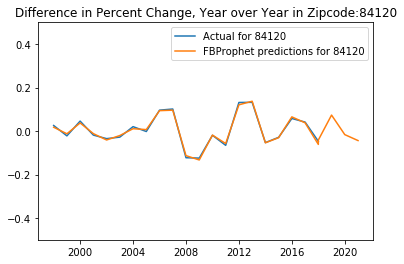

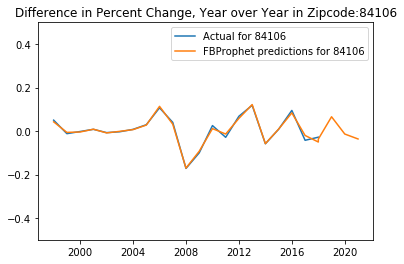

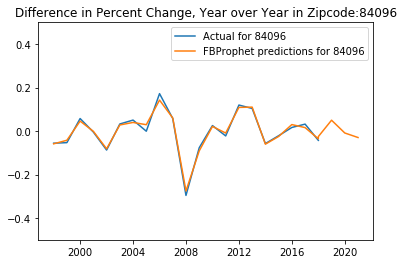

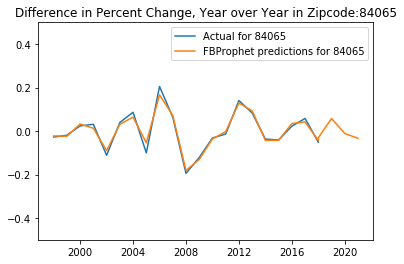

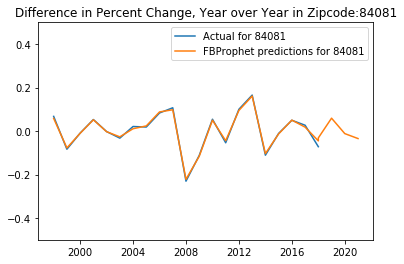

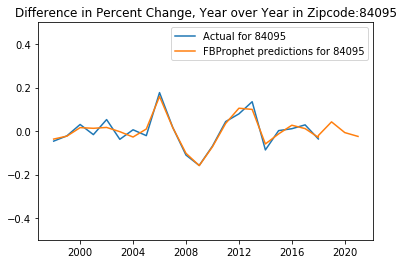

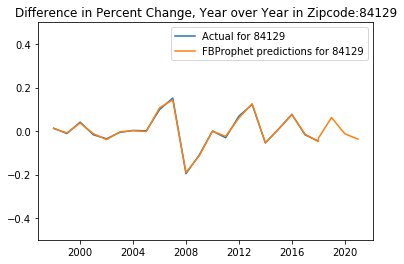

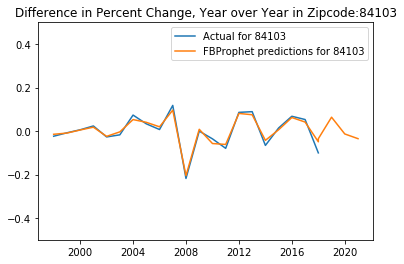

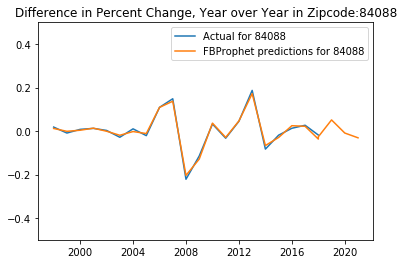

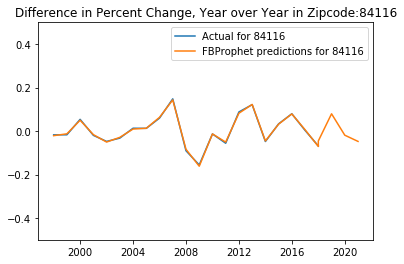

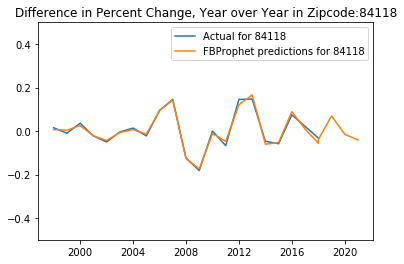

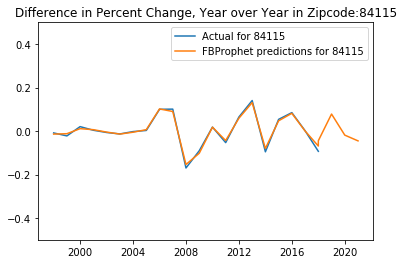

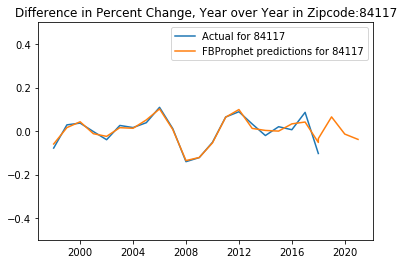

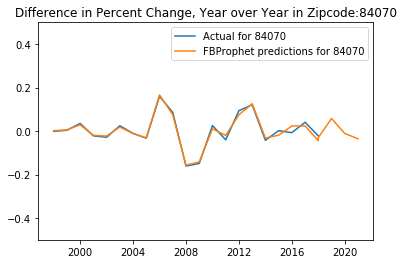

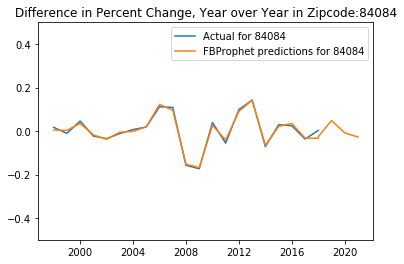

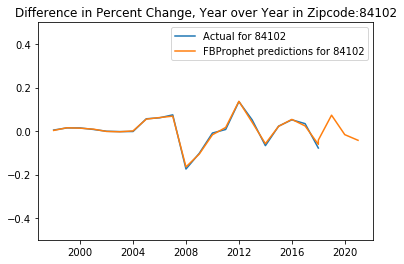

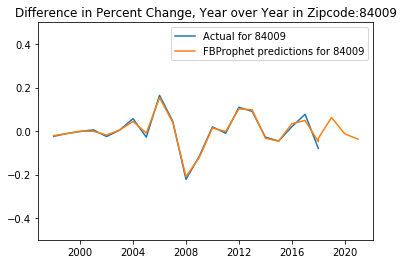

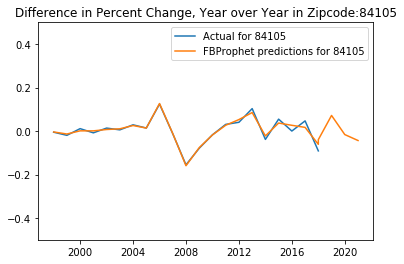

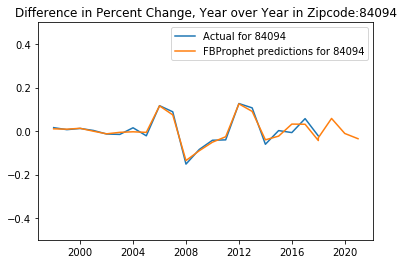

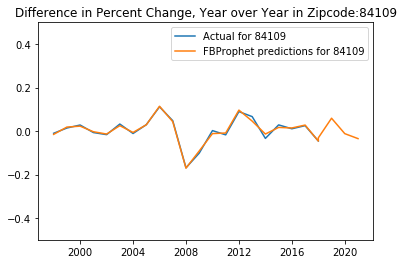

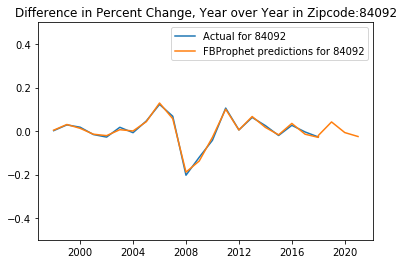

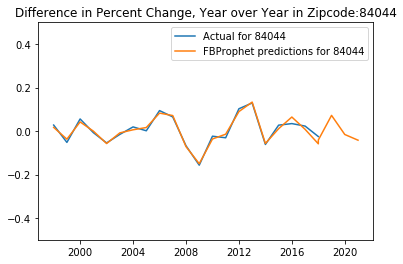

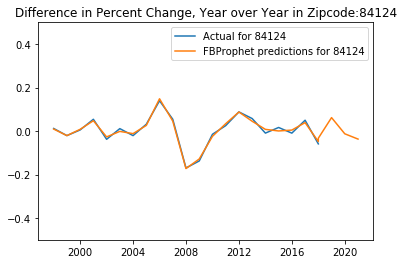

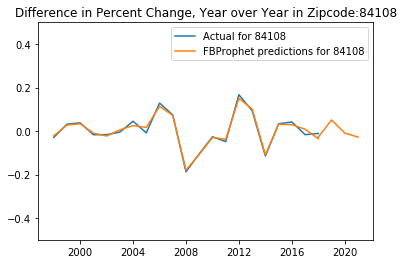

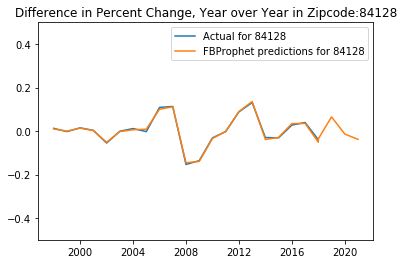

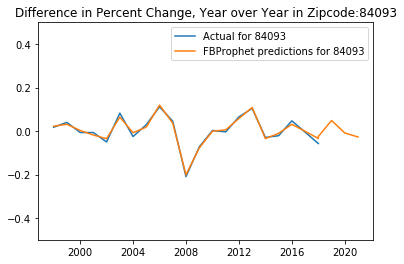

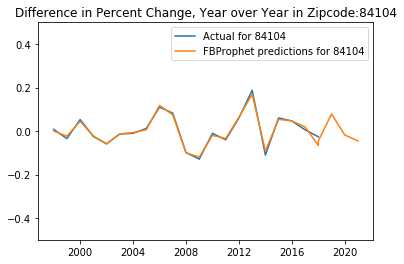

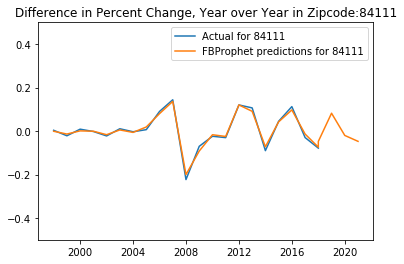

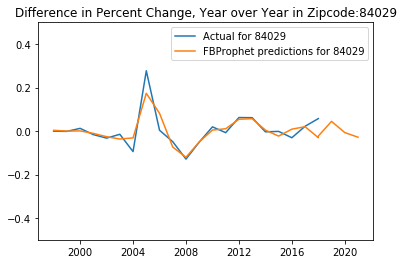

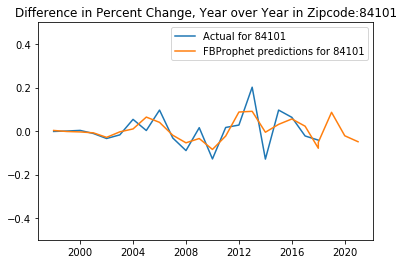

In [17]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct_diff.index, 
         metro_annual_pct_diff[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_ann.index, 
             fb_ann[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.5,0.5)
    plt.legend(loc='best')
    plt.title(f"Difference in Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()

In [23]:
metro_annual_pct_diff.tail(3).T

Date_index,2016-01-01,2017-01-01,2018-01-01
84119,0.056779,0.060899,-0.063851
84074,-0.022706,0.018413,0.045834
84121,0.019130,0.016691,-0.063097
84107,0.031137,0.040823,-0.076680
84020,0.010927,-0.010313,-0.005980
84047,0.030449,-0.006834,-0.033989
84123,0.036950,0.009125,0.014034
84120,0.057963,0.041360,-0.046879
84106,0.094969,-0.042430,-0.028082
84096,0.016600,0.031961,-0.042625
